In [1]:
!pip install geocoder
print("Install completed")

     |████████████████████████████████| 102kB 7.9MB/s ta 0:00:011
Install completed


In [2]:
import pandas as pd
import numpy as np

# Data extraction

We need to extract data from wikipedia to achieve the following information regarding postal code of Canada. Then, we will extract the borough of Toronto and using geocoder package to find out the corresponding latitude and longitude.

In [3]:
page = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df = pd.DataFrame(page[0])

data = df[df.Borough != 'Not assigned']
data.reset_index(drop = True, inplace = True)
print('The number of rows in the dataframe are = ' + str(data.shape[0]))
data.head()

The number of rows in the dataframe are = 103


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [4]:
import geocoder # import geocoder

def get_geocoder(postal_code):
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
        #g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    
    return latitude, longitude

In [14]:
lat = []
long = []
postal_code = data['Postal Code']
for i in range(postal_code.shape[0]):
    d = get_geocoder(postal_code[i])
    lat.append(d[0])
    long.append(d[1])

In [15]:
data['Latitude'], data['Longitude'] = [lat, long]
data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.752935,-79.335641
1,M4A,North York,Victoria Village,43.728102,-79.311890
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723265,-79.451211
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390


In [16]:
Toronto = data[data.Borough.str.contains('Toronto',case=False)].reset_index(drop = True)
Toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554
4,M4E,East Toronto,The Beaches,43.678148,-79.295349
5,M5E,Downtown Toronto,Berczy Park,43.645196,-79.373855
6,M5G,Downtown Toronto,Central Bay Street,43.656072,-79.385653
7,M6G,Downtown Toronto,Christie,43.668602,-79.420387
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650542,-79.384116
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.664910,-79.438664


## Foursquare API

We will use foursquare api to find out the neighborhood's venues and analyze what types of restaurants are existing. Then, we will cluster the results to find out the relationships.

In [8]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 9.2MB/s ta 0:00:011
Libraries imported.


In [9]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['Borough'], Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [17]:
# The code was removed by Watson Studio for sharing.

In [18]:
# credential information was hid from above cell
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
toronto_venues = getNearbyVenues(names=Toronto['Neighborhood'],
                                   latitudes=Toronto['Latitude'],
                                   longitudes=Toronto['Longitude'])

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [21]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.650964,-79.353041,Souk Tabule,43.653756,-79.354390,Mediterranean Restaurant
1,"Regent Park, Harbourfront",43.650964,-79.353041,Young Centre for the Performing Arts,43.650825,-79.357593,Performing Arts Venue
2,"Regent Park, Harbourfront",43.650964,-79.353041,SOMA chocolatemaker,43.650622,-79.358127,Chocolate Shop
3,"Regent Park, Harbourfront",43.650964,-79.353041,BATLgrounds,43.647088,-79.351306,Athletics & Sports
4,"Regent Park, Harbourfront",43.650964,-79.353041,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant


In [22]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# define a list of column names
cols = toronto_onehot.columns.tolist()
cols.insert(0, cols.pop(cols.index('Neighborhood')))
toronto_onehot = toronto_onehot.reindex(columns= cols)
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

toronto_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.0,0.00,0.015625,0.000000,0.000000,0.000000,0.0,0.015625,...,0.0,0.0,0.015625,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.015625
1,"Brockton, Parkdale Village, Exhibition Place",0.023256,0.0,0.00,0.023256,0.000000,0.023256,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.0,0.02,0.010000,0.000000,0.000000,0.030000,0.0,0.000000,...,0.0,0.0,0.020000,0.000000,0.000000,0.010000,0.0,0.0,0.0,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.015625,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,Central Bay Street,0.000000,0.0,0.00,0.000000,0.017544,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.017544,0.017544,0.017544,0.0,0.0,0.0,0.000000


In [23]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.03
3              Bakery  0.03
4                Café  0.03
5      Breakfast Spot  0.03
6          Restaurant  0.03
7            Beer Bar  0.03
8         Cheese Shop  0.03
9              Lounge  0.03


----Brockton, Parkdale Village, Exhibition Place----
                    venue  freq
0                    Café  0.07
1             Coffee Shop  0.07
2  Thrift / Vintage Store  0.05
3               Gift Shop  0.05
4                   Diner  0.05
5       Accessories Store  0.02
6             Pizza Place  0.02
7    Caribbean Restaurant  0.02
8            Chiropractor  0.02
9             Supermarket  0.02


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                      venue  freq
0               Coffee Shop  0.07
1                     Hotel  0.05
2                      Café  0.03
3       Japanese Restaurant  0.03


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Lounge,Seafood Restaurant,Cheese Shop,Hotel,Restaurant,Café,Breakfast Spot,Beer Bar
1,"Brockton, Parkdale Village, Exhibition Place",Coffee Shop,Café,Thrift / Vintage Store,Diner,Gift Shop,Accessories Store,Italian Restaurant,Brewery,Japanese Restaurant,North Indian Restaurant
2,"Business reply mail Processing Centre, South C...",Coffee Shop,Hotel,Japanese Restaurant,Restaurant,Asian Restaurant,Café,Taco Place,Concert Hall,Steakhouse,Sushi Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Café,Coffee Shop,French Restaurant,Park,Gym / Fitness Center,Lounge,Speakeasy,Bar,Italian Restaurant,Restaurant
4,Central Bay Street,Coffee Shop,Japanese Restaurant,Middle Eastern Restaurant,Café,Clothing Store,Plaza,Sandwich Place,Bubble Tea Shop,Ramen Restaurant,Restaurant


## Extract only restaurants value

In [26]:
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = Toronto
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041,0,Pub,Athletics & Sports,Coffee Shop,Café,Distribution Center,Bank,Mexican Restaurant,Food Truck,Seafood Restaurant,French Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390,0,Coffee Shop,Café,Sushi Restaurant,Yoga Studio,Theater,Creperie,Pharmacy,Discount Store,Distribution Center,College Auditorium
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529,0,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Italian Restaurant,Cosmetics Shop,Bar,Café,Hotel,Fast Food Restaurant,Japanese Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554,0,Café,Coffee Shop,Cocktail Bar,American Restaurant,Cosmetics Shop,Gastropub,Italian Restaurant,Department Store,Moroccan Restaurant,Lingerie Store
4,M4E,East Toronto,The Beaches,43.678148,-79.295349,0,Health Food Store,Pub,Trail,Yoga Studio,Dog Run,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
5,M5E,Downtown Toronto,Berczy Park,43.645196,-79.373855,0,Coffee Shop,Cocktail Bar,Lounge,Seafood Restaurant,Cheese Shop,Hotel,Restaurant,Café,Breakfast Spot,Beer Bar
6,M5G,Downtown Toronto,Central Bay Street,43.656072,-79.385653,0,Coffee Shop,Japanese Restaurant,Middle Eastern Restaurant,Café,Clothing Store,Plaza,Sandwich Place,Bubble Tea Shop,Ramen Restaurant,Restaurant
7,M6G,Downtown Toronto,Christie,43.668602,-79.420387,0,Café,Grocery Store,Coffee Shop,Park,Candy Store,Baby Store,Playground,Dessert Shop,Electronics Store,Fish Market
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650542,-79.384116,0,Coffee Shop,Café,Restaurant,Clothing Store,Salad Place,Deli / Bodega,Hotel,Thai Restaurant,Gym,Steakhouse
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.664910,-79.438664,0,Park,Grocery Store,Pharmacy,Athletics & Sports,Bus Line,Smoke Shop,Bank,Bakery,Café,Art Gallery


In [27]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
print(ys)
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

[array([0, 1, 2]), array([1, 3, 7]), array([ 2,  7, 20])]


In [28]:
restaurant_venue = toronto_venues[toronto_venues['Venue Category'].str.contains("Restaurant")]
print('There are {} uniques categories.'.format(len(restaurant_venue['Venue Category'].unique())))
restaurant_venue.head()

toronto_rest = pd.get_dummies(restaurant_venue[['Venue Category']], prefix="", prefix_sep="")
toronto_rest['Neighborhood'] = restaurant_venue['Neighborhood'] 

# define a list of column names
cols = toronto_rest.columns.tolist()
cols.insert(0, cols.pop(cols.index('Neighborhood')))
toronto_rest = toronto_rest.reindex(columns= cols)
toronto_rest_grouped = toronto_rest.groupby('Neighborhood').mean().reset_index()

toronto_rest_grouped.head()

There are 48 uniques categories.


,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Seafood Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.076923,...,0.153846,0.0,0.076923,0.0,0.0,0.076923,0.0,0.000000,0.076923,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.0,0.000000,0.090909,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.090909,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.0,0.071429,0.107143,0.0,0.035714,0.000000,0.000000,0.0,0.000000,...,0.071429,0.0,0.071429,0.0,0.0,0.071429,0.0,0.000000,0.071429,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.000000,0.055556,0.0,0.000000,0.055556,0.000000,0.0,0.000000,...,0.055556,0.0,0.055556,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,Central Bay Street,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.066667,0.0,0.000000,...,0.066667,0.0,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.066667


In [29]:
num_top_venues = 5

for hood in toronto_rest_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_rest_grouped[toronto_rest_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                           venue  freq
0                     Restaurant  0.15
1             Seafood Restaurant  0.15
2              French Restaurant  0.08
3  Vegetarian / Vegan Restaurant  0.08
4            Japanese Restaurant  0.08


----Brockton, Parkdale Village, Exhibition Place----
                 venue  freq
0    Korean Restaurant  0.09
1           Restaurant  0.09
2  Japanese Restaurant  0.09
3   Italian Restaurant  0.09
4    Indian Restaurant  0.09


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                           venue  freq
0                     Restaurant  0.11
1               Asian Restaurant  0.11
2            Japanese Restaurant  0.11
3       Mediterranean Restaurant  0.07
4  Vegetarian / Vegan Restaurant  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0   French Restaurant  0.17
1          Rest

In [30]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_rest_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_rest_venues_sorted['Neighborhood'] = toronto_rest_grouped['Neighborhood']

for ind in np.arange(toronto_rest_grouped.shape[0]):
    neighborhoods_rest_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_rest_grouped.iloc[ind, :], num_top_venues)

neighborhoods_rest_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Seafood Restaurant,Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,French Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Japanese Restaurant,Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant
2,"Business reply mail Processing Centre, South C...",Japanese Restaurant,Asian Restaurant,Restaurant,American Restaurant,Thai Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",French Restaurant,Restaurant,Italian Restaurant,Japanese Restaurant,Falafel Restaurant
4,Central Bay Street,Japanese Restaurant,Middle Eastern Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant


### Re-evaluate the venues

From the above, the '*restaurant*' value without any category types were found. To evaluate more elaborately, we will exclude the venue of '*restaurant*' then evaluate again to find out which type of restaurants are more clustered and existed in Toronto.

In [31]:
kclusters = 4

toronto_rest_grouped_clustering = toronto_rest_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_rest_grouped_clustering)
neighborhoods_rest_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighborhoods_rest_venues_sorted['Cluster Labels'] = kmeans.labels_
#k_labels = pd.DataFrame({'Cluster Labels': kmeans.labels_})
#neighborhoods_rest_venues_sorted.update(k_labels)
neighborhoods_rest_venues_sorted.head()

toronto_rest_merged = Toronto
toronto_rest_merged = toronto_rest_merged.join(neighborhoods_rest_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_rest_merged.dropna( inplace=True)
toronto_rest_merged.reset_index(drop = True)
toronto_rest_merged['Cluster Labels'] = toronto_rest_merged['Cluster Labels'].astype(int)
toronto_rest_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041,1,Thai Restaurant,French Restaurant,Mediterranean Restaurant,Mexican Restaurant,Seafood Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390,3,Sushi Restaurant,Middle Eastern Restaurant,Italian Restaurant,Vietnamese Restaurant,Eastern European Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529,1,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Ramen Restaurant,Fast Food Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554,1,American Restaurant,Restaurant,Italian Restaurant,Moroccan Restaurant,Seafood Restaurant
5,M5E,Downtown Toronto,Berczy Park,43.645196,-79.373855,1,Seafood Restaurant,Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,French Restaurant


In [32]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
print(ys)
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_rest_merged['Latitude'], toronto_rest_merged['Longitude'], toronto_rest_merged['Neighborhood'], toronto_rest_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

[array([0, 1, 2, 3]), array([ 1,  3,  7, 13]), array([ 2,  7, 20, 41]), array([ 3, 13, 41, 87])]


In [33]:
toronto_rest_merged.loc[toronto_rest_merged['Cluster Labels'] == 0, toronto_rest_merged.columns[[1] + list(range(5, toronto_rest_merged.shape[1]))]]
toronto_rest_merged.loc[toronto_rest_merged['Cluster Labels'] == 1, toronto_rest_merged.columns[[1] + list(range(5, toronto_rest_merged.shape[1]))]]
toronto_rest_merged.loc[toronto_rest_merged['Cluster Labels'] == 2, toronto_rest_merged.columns[[1] + list(range(5, toronto_rest_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Downtown Toronto,2,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Hawaiian Restaurant


In [34]:
toronto_rest_merged.loc[toronto_rest_merged['Cluster Labels'] == 0, toronto_rest_merged.columns[[1] + list(range(5, toronto_rest_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,East Toronto,0,Fast Food Restaurant,Sushi Restaurant,Restaurant,Italian Restaurant,Vietnamese Restaurant


In [35]:
toronto_rest_merged.loc[toronto_rest_merged['Cluster Labels'] == 3, toronto_rest_merged.columns[[1] + list(range(5, toronto_rest_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Downtown Toronto,3,Sushi Restaurant,Middle Eastern Restaurant,Italian Restaurant,Vietnamese Restaurant,Eastern European Restaurant


In [36]:
rest_fix = toronto_rest_grouped.drop('Restaurant',axis=1)
num_top_venues = 5

for hood in rest_fix['Neighborhood']:
    print("----"+hood+"----")
    temp = rest_fix[rest_fix['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                             venue  freq
0               Seafood Restaurant  0.15
1              Japanese Restaurant  0.08
2          Comfort Food Restaurant  0.08
3  Molecular Gastronomy Restaurant  0.08
4                 Greek Restaurant  0.08


----Brockton, Parkdale Village, Exhibition Place----
                     venue  freq
0      Japanese Restaurant  0.09
1  North Indian Restaurant  0.09
2        Korean Restaurant  0.09
3       Italian Restaurant  0.09
4        Indian Restaurant  0.09


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                           venue  freq
0            Japanese Restaurant  0.11
1               Asian Restaurant  0.11
2             Seafood Restaurant  0.07
3  Vegetarian / Vegan Restaurant  0.07
4            American Restaurant  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0    F

In [37]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_rest_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_rest_venues_sorted['Neighborhood'] = rest_fix['Neighborhood']

for ind in np.arange(rest_fix.shape[0]):
    neighborhoods_rest_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rest_fix.iloc[ind, :], num_top_venues)

neighborhoods_rest_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Seafood Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Eastern European Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Japanese Restaurant,North Indian Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant
2,"Business reply mail Processing Centre, South C...",Japanese Restaurant,Asian Restaurant,American Restaurant,Thai Restaurant,Italian Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",French Restaurant,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Falafel Restaurant
4,Central Bay Street,Japanese Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant


In [38]:
kclusters = 3

toronto_rest_grouped_clustering = rest_fix.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_rest_grouped_clustering)
neighborhoods_rest_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighborhoods_rest_venues_sorted['Cluster Labels'] = kmeans.labels_
#k_labels = pd.DataFrame({'Cluster Labels': kmeans.labels_})
#neighborhoods_rest_venues_sorted.update(k_labels)
neighborhoods_rest_venues_sorted.head()

toronto_rest_merged = Toronto
toronto_rest_merged = toronto_rest_merged.join(neighborhoods_rest_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_rest_merged.dropna( inplace=True)
toronto_rest_merged.reset_index(drop = True)
toronto_rest_merged['Cluster Labels'] = toronto_rest_merged['Cluster Labels'].astype(int)
toronto_rest_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041,0,Thai Restaurant,French Restaurant,Mediterranean Restaurant,Mexican Restaurant,Seafood Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390,2,Sushi Restaurant,Italian Restaurant,Middle Eastern Restaurant,Dumpling Restaurant,Hawaiian Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529,0,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Ramen Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554,0,American Restaurant,Seafood Restaurant,Italian Restaurant,Moroccan Restaurant,Japanese Restaurant
5,M5E,Downtown Toronto,Berczy Park,43.645196,-79.373855,0,Seafood Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Eastern European Restaurant


In [39]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
print(ys)
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_rest_merged['Latitude'], toronto_rest_merged['Longitude'], toronto_rest_merged['Neighborhood'], toronto_rest_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

[array([0, 1, 2]), array([1, 3, 7]), array([ 2,  7, 20])]


Text(0.5, 1.0, '1st Most Common Venue')

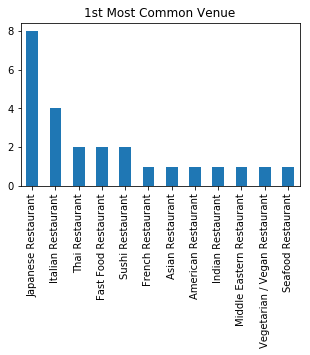

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
first = toronto_rest_merged['1st Most Common Venue']
first.value_counts().plot(kind='bar')
plt.title('1st Most Common Venue')

<Figure size 1440x720 with 0 Axes>

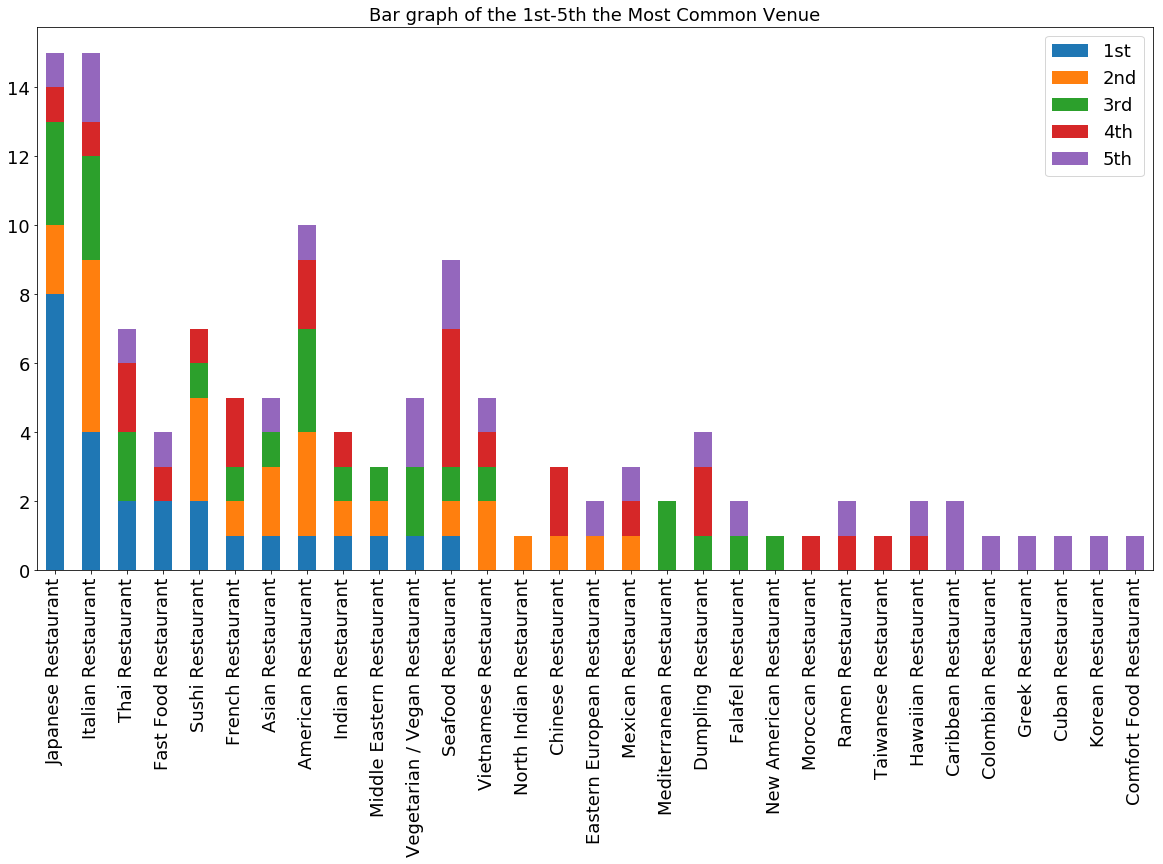

In [64]:
one = pd.DataFrame({'1st':first.value_counts()})

second = toronto_rest_merged['2nd Most Common Venue']
two = pd.DataFrame({'2nd':second.value_counts()})

third = toronto_rest_merged['3rd Most Common Venue']
three = pd.DataFrame({'3rd':third.value_counts()})

fourth = toronto_rest_merged['4th Most Common Venue']
four = pd.DataFrame({'4th':fourth.value_counts()})

fifth = toronto_rest_merged['5th Most Common Venue']
five = pd.DataFrame({'5th':fifth.value_counts()})

df5 = pd.concat([one, two, three, four, five], axis=1, sort = False)
df5.fillna(0, inplace = True)

plt.figure(figsize = (20,10))
df5.plot(kind='bar', stacked=True, figsize = (20,10), fontsize = 18)
plt.title('Bar graph of the 1st-5th the Most Common Venue', fontsize = 18)
plt.legend( prop={"size":18})

Text(0, 0.5, 'Counts')

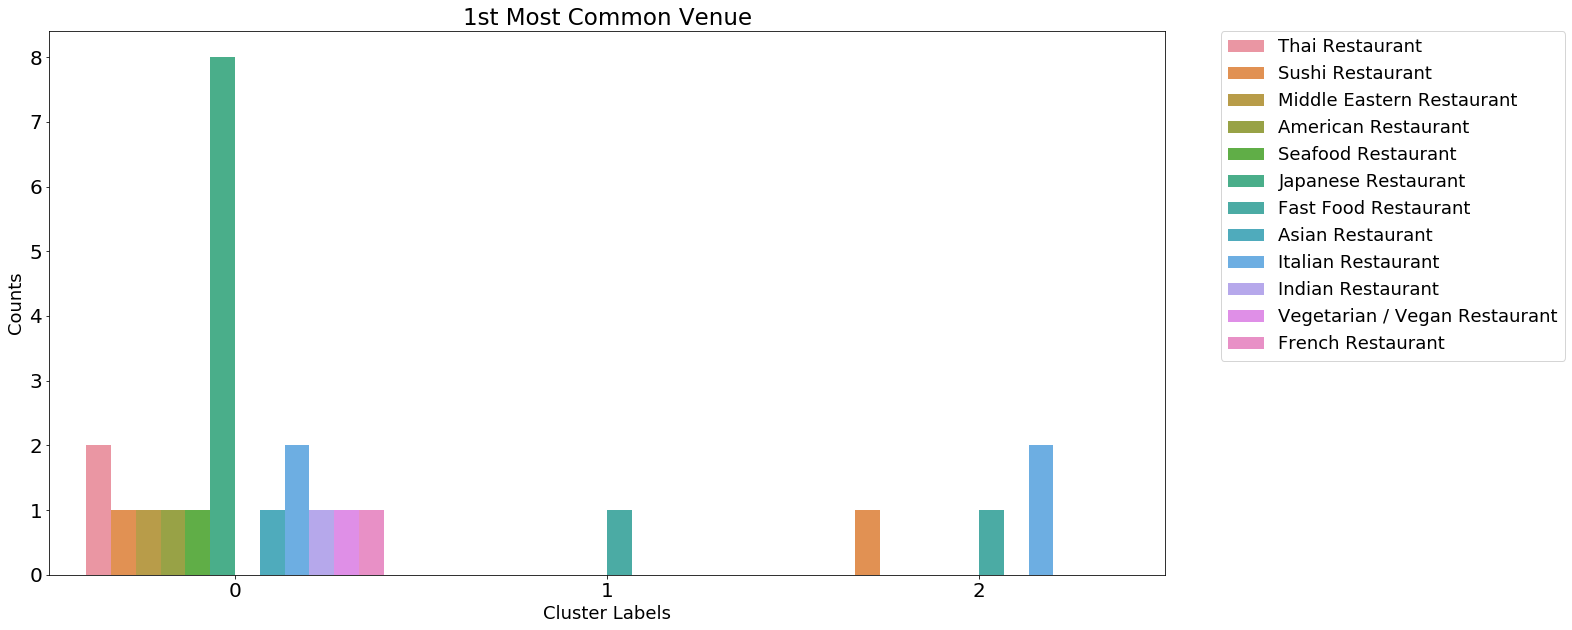

In [72]:
import seaborn as sns
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Cluster Labels", hue="1st Most Common Venue", data=toronto_rest_merged)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={"size":18})

ax.set_title('1st Most Common Venue', fontsize = 23)
ax.tick_params(labelsize=20)

ax.set_xlabel('Cluster Labels',fontsize = 18)
ax.set_ylabel('Counts',fontsize = 18)

In [73]:
a = toronto_rest_merged.loc[toronto_rest_merged['Cluster Labels'] == 0, toronto_rest_merged.columns[[1] + list(range(5, toronto_rest_merged.shape[1]))]]
b = toronto_rest_merged.loc[toronto_rest_merged['Cluster Labels'] == 1, toronto_rest_merged.columns[[1] + list(range(5, toronto_rest_merged.shape[1]))]]
c = toronto_rest_merged.loc[toronto_rest_merged['Cluster Labels'] == 2, toronto_rest_merged.columns[[1] + list(range(5, toronto_rest_merged.shape[1]))]]
toronto_rest_merged.sort_values(by = 'Cluster Labels', ascending = True)

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041,0,Thai Restaurant,French Restaurant,Mediterranean Restaurant,Mexican Restaurant,Seafood Restaurant
36,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648269,-79.381884,0,Japanese Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Thai Restaurant
35,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667656,-79.367326,0,Italian Restaurant,Chinese Restaurant,Japanese Restaurant,Taiwanese Restaurant,Caribbean Restaurant
34,M5W,Downtown Toronto,Stn A PO Boxes,43.648700,-79.385450,0,Japanese Restaurant,Asian Restaurant,American Restaurant,Thai Restaurant,Italian Restaurant
32,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.640539,-79.397435,0,French Restaurant,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Falafel Restaurant
30,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653497,-79.397410,0,Vegetarian / Vegan Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Caribbean Restaurant
27,M5S,Downtown Toronto,"University of Toronto, Harbord",43.663281,-79.398088,0,Japanese Restaurant,Italian Restaurant,French Restaurant,Chinese Restaurant,Comfort Food Restaurant
25,M6R,West Toronto,"Parkdale, Roncesvalles",43.647840,-79.448388,0,Sushi Restaurant,Eastern European Restaurant,Thai Restaurant,American Restaurant,Vietnamese Restaurant
24,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.674911,-79.403940,0,Indian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Mexican Restaurant
37,M4Y,Downtown Toronto,Church and Wellesley,43.666659,-79.381472,0,Japanese Restaurant,Sushi Restaurant,Mediterranean Restaurant,Ramen Restaurant,American Restaurant


In [80]:
# The code was removed by Watson Studio for sharing.

In [78]:
# The code was removed by Watson Studio for sharing.